## Теперь попробуем спрогнозировать границу дома

In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import os
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

def get_session(gpu_fraction=0.3):
    '''Assume that you have 6GB of GPU memory and want to allocate ~2GB'''

    num_threads = os.environ.get('OMP_NUM_THREADS')
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))
    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


KTF.set_session(get_session())

In [55]:
!nvidia-smi

Sat Nov 18 19:47:06 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.90                 Driver Version: 384.90                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    59W / 149W |   7100MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
import copy

import datetime

from shutil import copyfile
import os
import json

In [57]:
DESCRIPTION = """Make a border prediction.
Experiment_2017_11_18_08
"""

DATE = str(datetime.datetime.now())

DIR = './experiments/%s' % DATE

os.mkdir(DIR)

json.dump(DESCRIPTION, open(DIR + "/description.txt", "w"))
MODULES = ['dataset', 'unet', 'train_test_loader']

for m in MODULES:
    fname = "%s.py" % m
    copyfile(fname, DIR + '/' + fname)

[s, u, train_test_loader] = map(__import__, MODULES)

In [58]:
data_set = s.DataSet("./dataset/trainset", [s.ChannelPAN], image_size=(240,240), only_border=True)
ids = data_set.load()

train_ids, test_ids = train_test_loader.load_train_test()

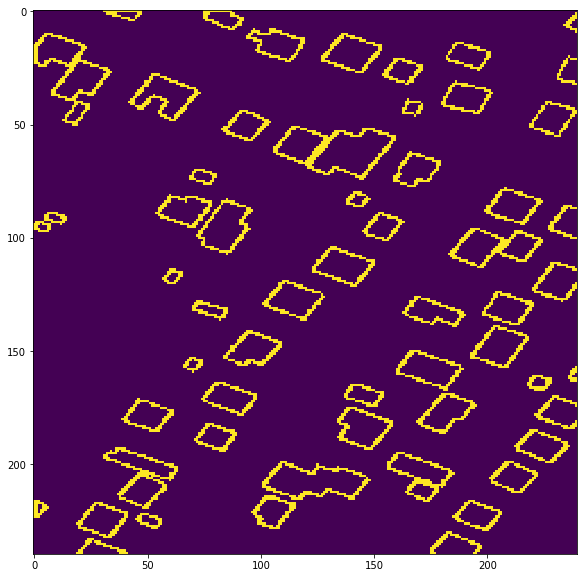

In [59]:
plt.figure(figsize=(10,10))
arr = data_set.get_mask(train_ids[3])
plt.imshow(arr)

In [60]:
net = u.UnetModel('classic-unet-border', data_set, DIR + "/model", lr=1e-4)

In [61]:
batch_generator = u.BatchGenerator(data_set, train_ids, random_rotate=True, shuffle_on_each_epoch=True)

In [62]:
net.train(batch_generator, epochs=60, batch_size=10)

epoch: 0, loss: 0.703946
epoch: 0, loss: 0.685957
epoch: 0, loss: 0.683520
epoch: 0, loss: 0.675437
epoch: 0, loss: 0.663405
epoch: 0, loss: 0.649396
epoch: 0, loss: 0.643246
epoch: 0, loss: 0.637990
epoch: 0, loss: 0.633419
epoch: 0, loss: 0.632136
epoch: 0, loss: 0.621976
epoch: 0, loss: 0.616299
epoch: 0, loss: 0.602931
epoch: 0, loss: 0.597594
epoch: 0, loss: 0.592070
epoch: 0, loss: 0.581521
epoch: 0, loss: 0.580274
epoch: 0, loss: 0.576311
epoch: 0, loss: 0.575867
epoch: 0, loss: 0.566424
epoch: 0, loss: 0.550279
epoch: 0, loss: 0.549807
epoch: 0, loss: 0.545766
epoch: 0, loss: 0.534561
epoch: 0, loss: 0.537045
epoch: 0, loss: 0.524137
epoch: 0, loss: 0.521124
epoch: 0, loss: 0.517981
epoch: 0, loss: 0.500893
epoch: 0, loss: 0.505399
epoch: 0, loss: 0.501127
epoch: 0, loss: 0.491314
epoch: 0, loss: 0.486629
epoch: 0, loss: 0.495590
epoch: 0, loss: 0.498328
epoch: 0, loss: 0.475146
epoch: 0, loss: 0.462495
epoch: 0, loss: 0.471402
epoch: 0, loss: 0.458047
epoch: 0, loss: 0.466874


epoch: 5, loss: 0.154593
epoch: 5, loss: 0.201589
epoch: 5, loss: 0.175544
epoch: 5, loss: 0.172129
epoch: 5, loss: 0.153917
epoch: 5, loss: 0.162542
epoch: 5, loss: 0.166973
epoch: 5, loss: 0.157045
epoch: 5, loss: 0.157479
epoch: 5, loss: 0.148027
epoch: 5, loss: 0.173039
epoch: 5, loss: 0.157688
epoch: 5, loss: 0.148310
epoch: 5, loss: 0.152374
epoch: 5, loss: 0.197164
epoch: 5, loss: 0.143594
epoch: 5, loss: 0.169472
epoch: 5, loss: 0.198596
epoch: 5, loss: 0.149436
epoch: 5, loss: 0.191244
epoch: 5, loss: 0.156805
epoch: 5, loss: 0.159913
epoch: 5, loss: 0.194026
epoch: 5, loss: 0.166268
epoch: 5, loss: 0.185929
epoch: 5, loss: 0.192955
epoch: 5, loss: 0.163680
epoch: 5, loss: 0.164053
epoch: 5, loss: 0.167735
epoch: 5, loss: 0.151948
epoch: 5, loss: 0.160376
epoch: 5, loss: 0.181712
epoch: 5, loss: 0.175731
epoch: 5, loss: 0.162068
epoch: 5, loss: 0.193374
epoch: 5, loss: 0.168241
epoch: 5, loss: 0.158237
epoch: 5, loss: 0.186715
epoch: 5, loss: 0.180482
epoch: 5, loss: 0.146051


epoch: 10, loss: 0.114548
epoch: 10, loss: 0.118843
epoch: 10, loss: 0.129503
epoch: 10, loss: 0.144406
epoch: 10, loss: 0.136937
epoch: 10, loss: 0.115028
epoch: 10, loss: 0.122550
epoch: 10, loss: 0.146078
epoch: 10, loss: 0.116549
epoch: 10, loss: 0.129017
epoch: 10, loss: 0.121546
epoch: 10, loss: 0.127454
epoch: 10, loss: 0.098346
epoch: 10, loss: 0.157008
epoch: 10, loss: 0.144141
epoch: 10, loss: 0.150755
epoch: 10, loss: 0.122653
epoch: 10, loss: 0.138842
epoch: 10, loss: 0.118944
epoch: 10, loss: 0.131046
epoch: 10, loss: 0.100378
epoch: 10, loss: 0.134654
epoch: 10, loss: 0.128913
epoch: 10, loss: 0.131844
epoch: 10, loss: 0.120396
epoch: 10, loss: 0.109043
epoch: 10, loss: 0.120594
epoch: 10, loss: 0.136595
epoch: 10, loss: 0.163685
epoch: 10, loss: 0.139890
epoch: 10, loss: 0.108374
epoch: 10, loss: 0.120561
epoch: 10, loss: 0.115166
epoch: 10, loss: 0.169457
epoch: 10, loss: 0.146366
epoch: 10, loss: 0.172866
epoch: 10, loss: 0.134817
epoch: 10, loss: 0.112636
epoch: 10, l

epoch: 14, loss: 0.096361
epoch: 14, loss: 0.095176
epoch: 14, loss: 0.076010
epoch: 15, loss: 0.121071
epoch: 15, loss: 0.115243
epoch: 15, loss: 0.099793
epoch: 15, loss: 0.100825
epoch: 15, loss: 0.150272
epoch: 15, loss: 0.127178
epoch: 15, loss: 0.128332
epoch: 15, loss: 0.107771
epoch: 15, loss: 0.118573
epoch: 15, loss: 0.099782
epoch: 15, loss: 0.094272
epoch: 15, loss: 0.088823
epoch: 15, loss: 0.102443
epoch: 15, loss: 0.081448
epoch: 15, loss: 0.106837
epoch: 15, loss: 0.097370
epoch: 15, loss: 0.093059
epoch: 15, loss: 0.093296
epoch: 15, loss: 0.108175
epoch: 15, loss: 0.096135
epoch: 15, loss: 0.139210
epoch: 15, loss: 0.095080
epoch: 15, loss: 0.140280
epoch: 15, loss: 0.082823
epoch: 15, loss: 0.154854
epoch: 15, loss: 0.111848
epoch: 15, loss: 0.130237
epoch: 15, loss: 0.118667
epoch: 15, loss: 0.102286
epoch: 15, loss: 0.122149
epoch: 15, loss: 0.100124
epoch: 15, loss: 0.126365
epoch: 15, loss: 0.094991
epoch: 15, loss: 0.117265
epoch: 15, loss: 0.173754
epoch: 15, l

epoch: 19, loss: 0.066860
epoch: 19, loss: 0.075556
epoch: 19, loss: 0.083138
epoch: 19, loss: 0.068074
epoch: 19, loss: 0.101637
epoch: 19, loss: 0.097457
epoch: 19, loss: 0.089144
epoch: 19, loss: 0.095393
epoch: 19, loss: 0.090707
epoch: 19, loss: 0.071926
epoch: 19, loss: 0.092179
epoch: 19, loss: 0.085563
epoch: 20, loss: 0.160722
epoch: 20, loss: 0.104009
epoch: 20, loss: 0.090356
epoch: 20, loss: 0.077319
epoch: 20, loss: 0.096738
epoch: 20, loss: 0.112300
epoch: 20, loss: 0.106272
epoch: 20, loss: 0.103982
epoch: 20, loss: 0.101436
epoch: 20, loss: 0.117178
epoch: 20, loss: 0.080348
epoch: 20, loss: 0.121076
epoch: 20, loss: 0.083505
epoch: 20, loss: 0.106947
epoch: 20, loss: 0.105563
epoch: 20, loss: 0.089242
epoch: 20, loss: 0.126438
epoch: 20, loss: 0.089544
epoch: 20, loss: 0.092437
epoch: 20, loss: 0.087309
epoch: 20, loss: 0.074368
epoch: 20, loss: 0.086239
epoch: 20, loss: 0.106904
epoch: 20, loss: 0.114568
epoch: 20, loss: 0.085482
epoch: 20, loss: 0.095700
epoch: 20, l

epoch: 24, loss: 0.101632
epoch: 24, loss: 0.067188
epoch: 24, loss: 0.092919
epoch: 24, loss: 0.087770
epoch: 24, loss: 0.071680
epoch: 24, loss: 0.079346
epoch: 24, loss: 0.049821
epoch: 24, loss: 0.079790
epoch: 24, loss: 0.107224
epoch: 24, loss: 0.108986
epoch: 24, loss: 0.094214
epoch: 24, loss: 0.107392
epoch: 24, loss: 0.134114
epoch: 24, loss: 0.086402
epoch: 24, loss: 0.113337
epoch: 24, loss: 0.073422
epoch: 24, loss: 0.091275
epoch: 24, loss: 0.068693
epoch: 24, loss: 0.079982
epoch: 24, loss: 0.078565
epoch: 24, loss: 0.072740
epoch: 25, loss: 0.070060
epoch: 25, loss: 0.109174
epoch: 25, loss: 0.112906
epoch: 25, loss: 0.084403
epoch: 25, loss: 0.093671
epoch: 25, loss: 0.091684
epoch: 25, loss: 0.079086
epoch: 25, loss: 0.070831
epoch: 25, loss: 0.071883
epoch: 25, loss: 0.066238
epoch: 25, loss: 0.069958
epoch: 25, loss: 0.077926
epoch: 25, loss: 0.113995
epoch: 25, loss: 0.055609
epoch: 25, loss: 0.087125
epoch: 25, loss: 0.113714
epoch: 25, loss: 0.076450
epoch: 25, l

epoch: 29, loss: 0.121529
epoch: 29, loss: 0.075591
epoch: 29, loss: 0.096524
epoch: 29, loss: 0.145756
epoch: 29, loss: 0.070221
epoch: 29, loss: 0.078066
epoch: 29, loss: 0.094890
epoch: 29, loss: 0.088656
epoch: 29, loss: 0.112428
epoch: 29, loss: 0.121619
epoch: 29, loss: 0.064433
epoch: 29, loss: 0.074837
epoch: 29, loss: 0.062274
epoch: 29, loss: 0.091885
epoch: 29, loss: 0.113695
epoch: 29, loss: 0.062712
epoch: 29, loss: 0.111376
epoch: 29, loss: 0.068192
epoch: 29, loss: 0.084835
epoch: 29, loss: 0.092441
epoch: 29, loss: 0.090951
epoch: 29, loss: 0.082067
epoch: 29, loss: 0.051838
epoch: 29, loss: 0.067692
epoch: 29, loss: 0.071701
epoch: 29, loss: 0.061714
epoch: 29, loss: 0.032755
epoch: 29, loss: 0.062389
epoch: 29, loss: 0.071906
epoch: 29, loss: 0.044177
epoch: 30, loss: 0.074271
epoch: 30, loss: 0.082048
epoch: 30, loss: 0.079380
epoch: 30, loss: 0.054953
epoch: 30, loss: 0.073130
epoch: 30, loss: 0.098556
epoch: 30, loss: 0.076687
epoch: 30, loss: 0.088939
epoch: 30, l

epoch: 34, loss: 0.121807
epoch: 34, loss: 0.073690
epoch: 34, loss: 0.106748
epoch: 34, loss: 0.132027
epoch: 34, loss: 0.143297
epoch: 34, loss: 0.103625
epoch: 34, loss: 0.071391
epoch: 34, loss: 0.087194
epoch: 34, loss: 0.061075
epoch: 34, loss: 0.062052
epoch: 34, loss: 0.087699
epoch: 34, loss: 0.101170
epoch: 34, loss: 0.091845
epoch: 34, loss: 0.090643
epoch: 34, loss: 0.044824
epoch: 34, loss: 0.046090
epoch: 34, loss: 0.055559
epoch: 34, loss: 0.066621
epoch: 34, loss: 0.072131
epoch: 34, loss: 0.065368
epoch: 34, loss: 0.073613
epoch: 34, loss: 0.101203
epoch: 34, loss: 0.082398
epoch: 34, loss: 0.049210
epoch: 34, loss: 0.072741
epoch: 34, loss: 0.078697
epoch: 34, loss: 0.093589
epoch: 34, loss: 0.053809
epoch: 34, loss: 0.086373
epoch: 34, loss: 0.034667
epoch: 34, loss: 0.109577
epoch: 34, loss: 0.072125
epoch: 34, loss: 0.054549
epoch: 34, loss: 0.097749
epoch: 34, loss: 0.102811
epoch: 34, loss: 0.091587
epoch: 34, loss: 0.094749
epoch: 34, loss: 0.046651
epoch: 34, l

epoch: 39, loss: 0.091438
epoch: 39, loss: 0.078415
epoch: 39, loss: 0.079708
epoch: 39, loss: 0.113835
epoch: 39, loss: 0.089957
epoch: 39, loss: 0.058728
epoch: 39, loss: 0.104386
epoch: 39, loss: 0.039183
epoch: 39, loss: 0.100345
epoch: 39, loss: 0.042782
epoch: 39, loss: 0.076556
epoch: 39, loss: 0.075004
epoch: 39, loss: 0.073715
epoch: 39, loss: 0.096779
epoch: 39, loss: 0.069710
epoch: 39, loss: 0.103383
epoch: 39, loss: 0.060971
epoch: 39, loss: 0.085114
epoch: 39, loss: 0.061454
epoch: 39, loss: 0.073904
epoch: 39, loss: 0.107011
epoch: 39, loss: 0.091469
epoch: 39, loss: 0.081899
epoch: 39, loss: 0.076895
epoch: 39, loss: 0.091784
epoch: 39, loss: 0.101689
epoch: 39, loss: 0.086879
epoch: 39, loss: 0.121950
epoch: 39, loss: 0.061181
epoch: 39, loss: 0.066766
epoch: 39, loss: 0.086849
epoch: 39, loss: 0.070583
epoch: 39, loss: 0.100188
epoch: 39, loss: 0.060637
epoch: 39, loss: 0.128543
epoch: 39, loss: 0.054386
epoch: 39, loss: 0.137426
epoch: 39, loss: 0.050647
epoch: 39, l

epoch: 44, loss: 0.054552
epoch: 44, loss: 0.078729
epoch: 44, loss: 0.078088
epoch: 44, loss: 0.073779
epoch: 44, loss: 0.046015
epoch: 44, loss: 0.058590
epoch: 44, loss: 0.141701
epoch: 44, loss: 0.074973
epoch: 44, loss: 0.020533
epoch: 44, loss: 0.125424
epoch: 44, loss: 0.073436
epoch: 44, loss: 0.048644
epoch: 44, loss: 0.049651
epoch: 44, loss: 0.072421
epoch: 44, loss: 0.089866
epoch: 44, loss: 0.057811
epoch: 44, loss: 0.070740
epoch: 44, loss: 0.094089
epoch: 44, loss: 0.096906
epoch: 44, loss: 0.096584
epoch: 44, loss: 0.077938
epoch: 44, loss: 0.084094
epoch: 44, loss: 0.078146
epoch: 44, loss: 0.119039
epoch: 44, loss: 0.066272
epoch: 44, loss: 0.082846
epoch: 44, loss: 0.033006
epoch: 44, loss: 0.082688
epoch: 44, loss: 0.063018
epoch: 44, loss: 0.056413
epoch: 44, loss: 0.072604
epoch: 44, loss: 0.068904
epoch: 44, loss: 0.104961
epoch: 44, loss: 0.099466
epoch: 44, loss: 0.122646
epoch: 44, loss: 0.092864
epoch: 44, loss: 0.120030
epoch: 44, loss: 0.066757
epoch: 44, l

epoch: 48, loss: 0.085864
epoch: 49, loss: 0.052169
epoch: 49, loss: 0.089709
epoch: 49, loss: 0.120373
epoch: 49, loss: 0.119468
epoch: 49, loss: 0.064141
epoch: 49, loss: 0.102820
epoch: 49, loss: 0.093479
epoch: 49, loss: 0.108581
epoch: 49, loss: 0.063881
epoch: 49, loss: 0.082234
epoch: 49, loss: 0.032649
epoch: 49, loss: 0.045492
epoch: 49, loss: 0.068167
epoch: 49, loss: 0.053020
epoch: 49, loss: 0.086061
epoch: 49, loss: 0.058525
epoch: 49, loss: 0.081853
epoch: 49, loss: 0.071401
epoch: 49, loss: 0.036466
epoch: 49, loss: 0.096504
epoch: 49, loss: 0.070723
epoch: 49, loss: 0.040023
epoch: 49, loss: 0.066129
epoch: 49, loss: 0.081006
epoch: 49, loss: 0.070664
epoch: 49, loss: 0.076210
epoch: 49, loss: 0.053738
epoch: 49, loss: 0.041286
epoch: 49, loss: 0.054609
epoch: 49, loss: 0.037515
epoch: 49, loss: 0.032480
epoch: 49, loss: 0.088128
epoch: 49, loss: 0.081456
epoch: 49, loss: 0.085098
epoch: 49, loss: 0.038815
epoch: 49, loss: 0.040816
epoch: 49, loss: 0.064631
epoch: 49, l

epoch: 53, loss: 0.052386
epoch: 53, loss: 0.066145
epoch: 53, loss: 0.058230
epoch: 53, loss: 0.063745
epoch: 53, loss: 0.038169
epoch: 53, loss: 0.082895
epoch: 53, loss: 0.072619
epoch: 53, loss: 0.057765
epoch: 53, loss: 0.101985
epoch: 53, loss: 0.101349
epoch: 54, loss: 0.025525
epoch: 54, loss: 0.068178
epoch: 54, loss: 0.068664
epoch: 54, loss: 0.041818
epoch: 54, loss: 0.062034
epoch: 54, loss: 0.054382
epoch: 54, loss: 0.105378
epoch: 54, loss: 0.083478
epoch: 54, loss: 0.058677
epoch: 54, loss: 0.025031
epoch: 54, loss: 0.151012
epoch: 54, loss: 0.039449
epoch: 54, loss: 0.087207
epoch: 54, loss: 0.059278
epoch: 54, loss: 0.068371
epoch: 54, loss: 0.057851
epoch: 54, loss: 0.056076
epoch: 54, loss: 0.062712
epoch: 54, loss: 0.036990
epoch: 54, loss: 0.066106
epoch: 54, loss: 0.062321
epoch: 54, loss: 0.087589
epoch: 54, loss: 0.072128
epoch: 54, loss: 0.074755
epoch: 54, loss: 0.066249
epoch: 54, loss: 0.080587
epoch: 54, loss: 0.075333
epoch: 54, loss: 0.088648
epoch: 54, l

epoch: 58, loss: 0.059062
epoch: 58, loss: 0.069266
epoch: 58, loss: 0.111555
epoch: 58, loss: 0.067835
epoch: 58, loss: 0.087412
epoch: 58, loss: 0.043305
epoch: 58, loss: 0.046122
epoch: 58, loss: 0.098306
epoch: 58, loss: 0.033450
epoch: 58, loss: 0.052738
epoch: 58, loss: 0.095045
epoch: 58, loss: 0.037403
epoch: 58, loss: 0.052285
epoch: 58, loss: 0.057740
epoch: 58, loss: 0.070817
epoch: 58, loss: 0.059938
epoch: 58, loss: 0.039004
epoch: 58, loss: 0.047028
epoch: 58, loss: 0.049797
epoch: 59, loss: 0.086463
epoch: 59, loss: 0.037719
epoch: 59, loss: 0.083026
epoch: 59, loss: 0.068134
epoch: 59, loss: 0.128577
epoch: 59, loss: 0.027757
epoch: 59, loss: 0.090736
epoch: 59, loss: 0.050122
epoch: 59, loss: 0.093476
epoch: 59, loss: 0.048744
epoch: 59, loss: 0.040447
epoch: 59, loss: 0.071084
epoch: 59, loss: 0.072232
epoch: 59, loss: 0.060214
epoch: 59, loss: 0.050828
epoch: 59, loss: 0.075777
epoch: 59, loss: 0.053078
epoch: 59, loss: 0.077512
epoch: 59, loss: 0.080884
epoch: 59, l